In [12]:
# Image Segmentation Data Explorer
# A friendly script to explore your dataset before building a U-Net model
# Perfect for automotive scene segmentation projects!

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

def welcome_message():
    """Say hello and explain what we're doing"""
    print("Welcome to your Image Segmentation Project! ")
    print("Let's explore your dataset together...")
    print("-" * 60)

def explore_project_structure():
    """Take a look around the project folder"""
    print(f"We're currently working in: {os.getcwd()}")
    print("\nHere's what I can see in your project folder:")
    
    items = os.listdir('.')
    folders = [item for item in items if os.path.isdir(item)]
    files = [item for item in items if os.path.isfile(item)]
    
    if folders:
        print("   Folders:")
        for folder in sorted(folders):
            print(f"    • {folder}/")
    
    if files:
        print("   Files:")
        for file in sorted(files):
            print(f"    • {file}")

def check_data_folder():
    """See what's inside the data folder"""
    print("\n" + "="*50)
    print("Let's peek inside your data folder...")
    
    data_path = "data"
    if not os.path.exists(data_path):
        print(" Oops! I can't find a 'data' folder here.")
        print("   Make sure your images are in a folder called 'data'")
        return False
    
    print("Great! Found your data folder. Here's what's inside:")
    items = os.listdir(data_path)
    
    for item in sorted(items):
        full_path = os.path.join(data_path, item)
        if os.path.isdir(full_path):
            print(f"   {item}/")
        else:
            print(f"  {item}")
    
    return True

def explore_rgb_images():
    """Check out the RGB images (the actual photos)"""
    print("\n" + "="*50)
    print("  Exploring your RGB images...")
    
    rgb_path = os.path.join("data", "CameraRGB")
    
    if not os.path.exists(rgb_path):
        print(" I don't see a 'CameraRGB' folder in your data directory.")
        print("   Your RGB images should be in 'data/CameraRGB/'")
        return None
    
    # Find all image files
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
    rgb_files = [f for f in os.listdir(rgb_path) 
                 if f.lower().endswith(image_extensions)]
    
    if not rgb_files:
        print(" The CameraRGB folder is empty or has no image files.")
        return None
    
    print(f" Found {len(rgb_files)} RGB images! 🎉")
    print(f"   Sample filenames: {', '.join(rgb_files[:3])}...")
    
    # Let's look at one image to understand the format
    sample_path = os.path.join(rgb_path, rgb_files[0])
    try:
        sample_image = plt.imread(sample_path)
        height, width = sample_image.shape[:2]
        channels = sample_image.shape[2] if len(sample_image.shape) == 3 else 1
        
        print(f"   Image size: {width} × {height} pixels")
        print(f"   Color channels: {channels}")
        print(f"   Data type: {sample_image.dtype}")
        print(f"   Pixel values range from {sample_image.min():.3f} to {sample_image.max():.3f}")
        
        return rgb_files
        
    except Exception as e:
        print(f" Had trouble reading the image: {str(e)}")
        return None

def explore_mask_images():
    """Check out the segmentation masks"""
    print("\n" + "="*50)
    print("Exploring your segmentation masks...")
    
    mask_path = os.path.join("data", "CameraMask")
    
    if not os.path.exists(mask_path):
        print(" Can't find a 'CameraMask' folder in your data directory.")
        print("   Your mask images should be in 'data/CameraMask/'")
        return None
    
    # Find all mask files
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
    mask_files = [f for f in os.listdir(mask_path) 
                  if f.lower().endswith(image_extensions)]
    
    if not mask_files:
        print(" The CameraMask folder is empty or has no image files.")
        return None
    
    print(f" Found {len(mask_files)} mask images!")
    print(f"   Sample filenames: {', '.join(mask_files[:3])}...")
    
    # Analyze a sample mask
    sample_path = os.path.join(mask_path, mask_files[0])
    try:
        sample_mask = plt.imread(sample_path)
        
        # Handle different mask formats
        if len(sample_mask.shape) == 3:
            # If it's RGB, convert to grayscale or take one channel
            sample_mask = sample_mask[:,:,0] if sample_mask.shape[2] > 1 else sample_mask
        
        unique_values = np.unique(sample_mask)
        num_classes = len(unique_values)
        
        print(f"   Mask size: {sample_mask.shape[1]} × {sample_mask.shape[0]} pixels")
        print(f"   Number of different classes: {num_classes}")
        print(f"   Class values: {unique_values[:10]}..." if num_classes > 10 else f"   Class values: {unique_values}")
        print(f"   Data type: {sample_mask.dtype}")
        
        return mask_files
        
    except Exception as e:
        print(f" Had trouble reading the mask: {str(e)}")
        return None

def explore_text_files():
    """Look for any text files with additional info"""
    print("\n" + "="*50)
    print("Looking for text files with dataset info...")
    
    txt_files = [f for f in os.listdir("data") if f.endswith('.txt')]
    
    if not txt_files:
        print("   No text files found - that's okay!")
        return
    
    print(f" Found text file(s): {', '.join(txt_files)}")
    
    # Read the first text file
    txt_path = os.path.join("data", txt_files[0])
    try:
        with open(txt_path, 'r') as file:
            content = file.read()
            lines = [line.strip() for line in content.split('\n') if line.strip()]
        
        print(f"    {txt_files[0]} contains {len(lines)} lines")
        print(f"   First few lines:")
        for i, line in enumerate(lines[:5]):
            print(f"      {i+1}: {line}")
        
        if len(lines) > 10:
            print(f"   ... and {len(lines) - 5} more lines")
            
    except Exception as e:
        print(f"    Couldn't read the text file: {str(e)}")

def final_summary(rgb_files, mask_files):
    """Give a nice summary of what we found"""
    print("\n" + "="*60)
    print(" DATASET SUMMARY")
    print("="*60)
    
    if rgb_files and mask_files:
        print(f"  RGB Images: {len(rgb_files)}")
        print(f" Mask Images: {len(mask_files)}")
        
        if len(rgb_files) == len(mask_files):
            print(" Perfect! You have the same number of images and masks")
        else:
            print("  Warning: Different number of images and masks!")
            print("   Make sure each image has a corresponding mask")
        
        print("\nready for the next steps:")
        print("   1.  Visualize some sample images and their masks")
        print("   2.  Preprocess the data (resize, normalize)")
        print("   3.  Build your U-Net model")
        print("   4.   Train the model")
        print("   5. Evaluate performance")
        
    else:
        print(" Missing data - please check  folder structure:")
        print("    data/")
        print("   ├──  CameraRGB/     (your original images)")
        print("   └── CameraMask/    (your segmentation masks)")

def main():
    """Run the complete data exploration"""
    welcome_message()
    explore_project_structure()
    
    if not check_data_folder():
        return
    
    rgb_files = explore_rgb_images()
    mask_files = explore_mask_images()
    explore_text_files()
    final_summary(rgb_files, mask_files)
    
    print("\n" + "="*60)
    print(" Data exploration complete! Happy training! ")

# Run the exploration
if __name__ == "__main__":
    main()

Welcome to your Image Segmentation Project! 
Let's explore your dataset together...
------------------------------------------------------------
We're currently working in: C:\Users\mohan\OneDrive\Desktop\imagesegmentation

Here's what I can see in your project folder:
   Folders:
    • .ipynb_checkpoints/
    • data/
   Files:
    • ImageSegmentation.ipynb
    • unet_segmentation_model.h5

Let's peek inside your data folder...
Great! Found your data folder. Here's what's inside:
   CameraMask/
   CameraRGB/
  Disclaimer.txt

  Exploring your RGB images...
 Found 1060 RGB images! 🎉
   Sample filenames: 000026.png, 000027.png, 000028.png...
   Image size: 640 × 480 pixels
   Color channels: 4
   Data type: float32
   Pixel values range from 0.063 to 1.000

Exploring your segmentation masks...
 Found 1060 mask images!
   Sample filenames: 000026.png, 000027.png, 000028.png...
   Mask size: 640 × 480 pixels
   Number of different classes: 13
   Class values: [0.00392157 0.01960784 0.02352

Let's see what our data looks like
We have 1060 RGB images
We have 1060 mask images

Here are the first 6 images:


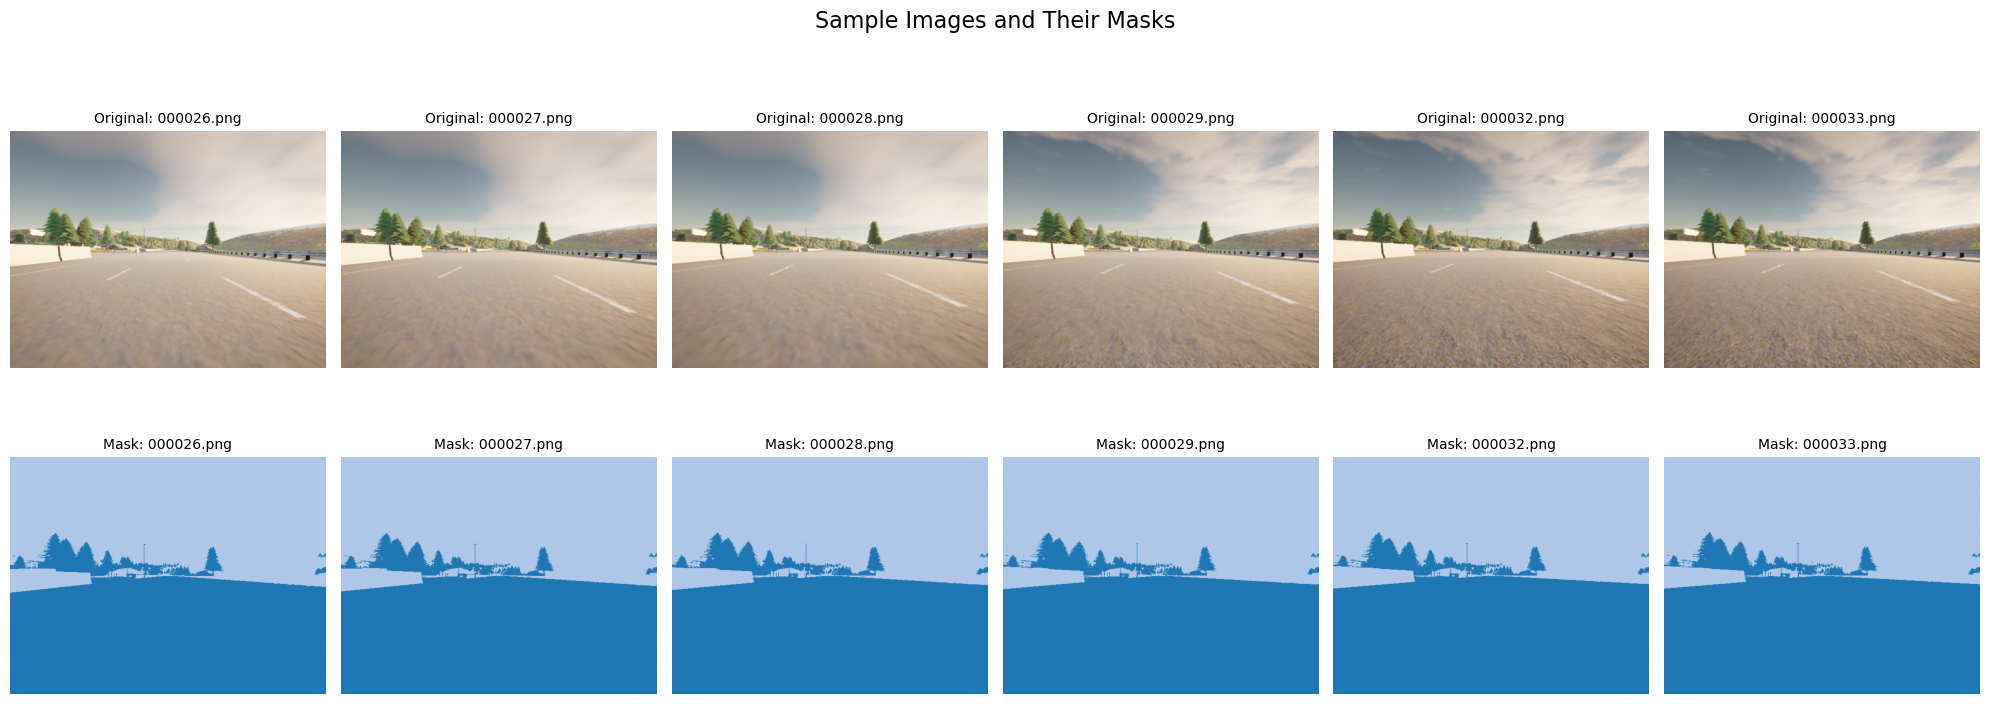


And here are 6 random examples:


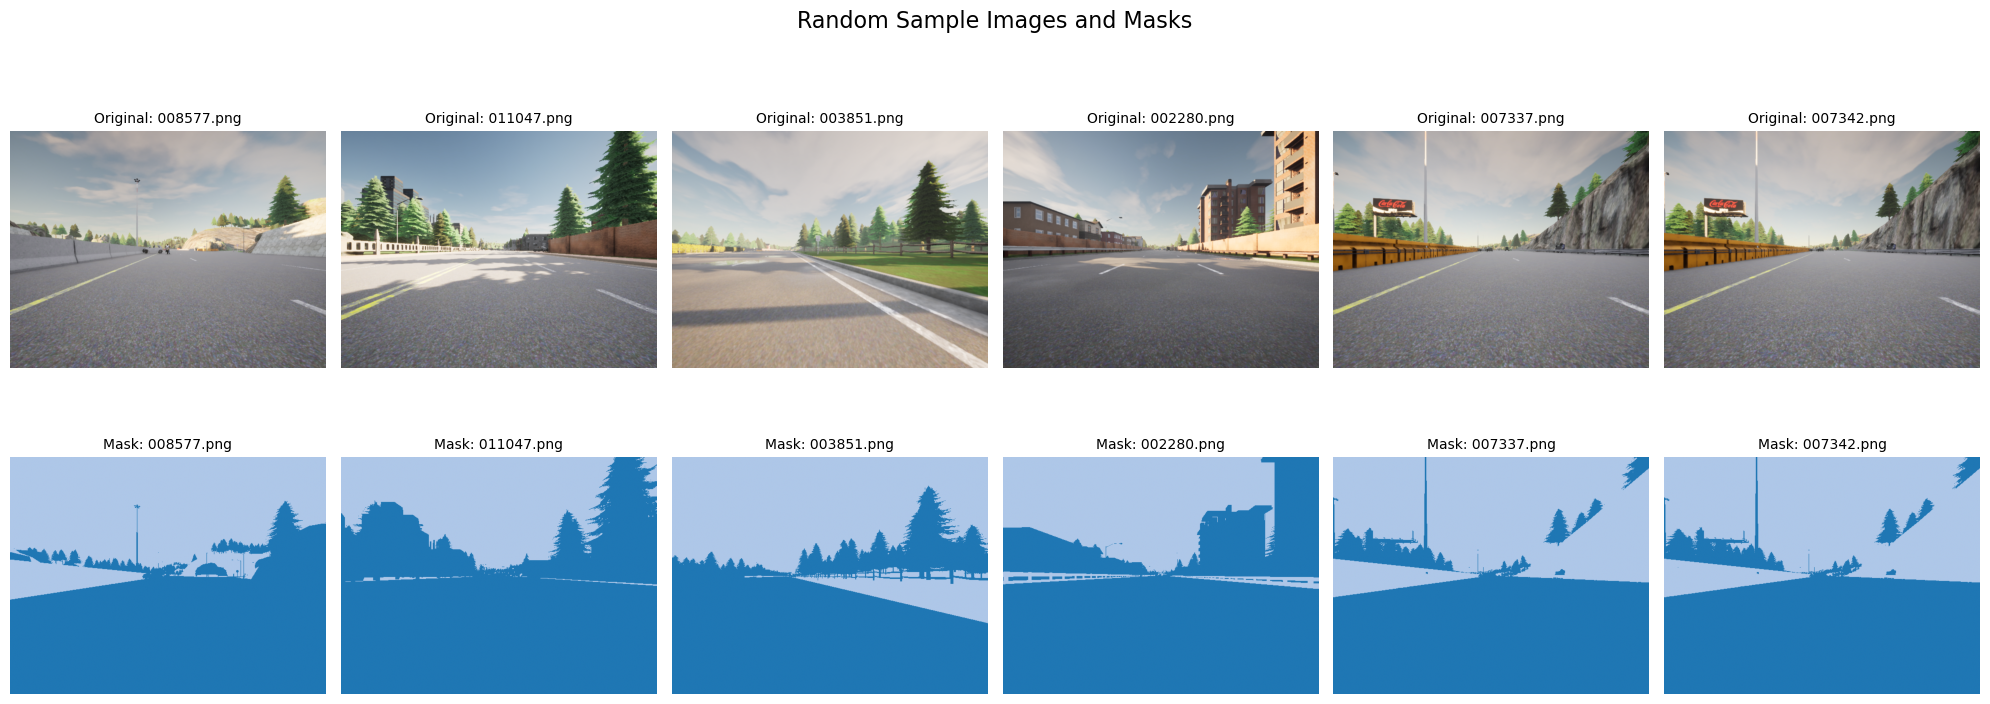


Let's see what different classes are in our masks:
Found 20 different classes
The values are: [0.00392157 0.00784314 0.01176471 0.01568628 0.01960784 0.02352941
 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726 0.04705882
 0.05098039 0.05490196 0.06666667 0.07058824 0.07450981 0.07843138
 0.08235294 0.08627451]

Mapping each value to a class number:
  0.003922 becomes Class 0
  0.007843 becomes Class 1
  0.011765 becomes Class 2
  0.015686 becomes Class 3
  0.019608 becomes Class 4
  0.023529 becomes Class 5
  0.027451 becomes Class 6
  0.031373 becomes Class 7
  0.035294 becomes Class 8
  0.039216 becomes Class 9
  0.043137 becomes Class 10
  0.047059 becomes Class 11
  0.050980 becomes Class 12
  0.054902 becomes Class 13
  0.066667 becomes Class 14
  0.070588 becomes Class 15
  0.074510 becomes Class 16
  0.078431 becomes Class 17
  0.082353 becomes Class 18
  0.086275 becomes Class 19


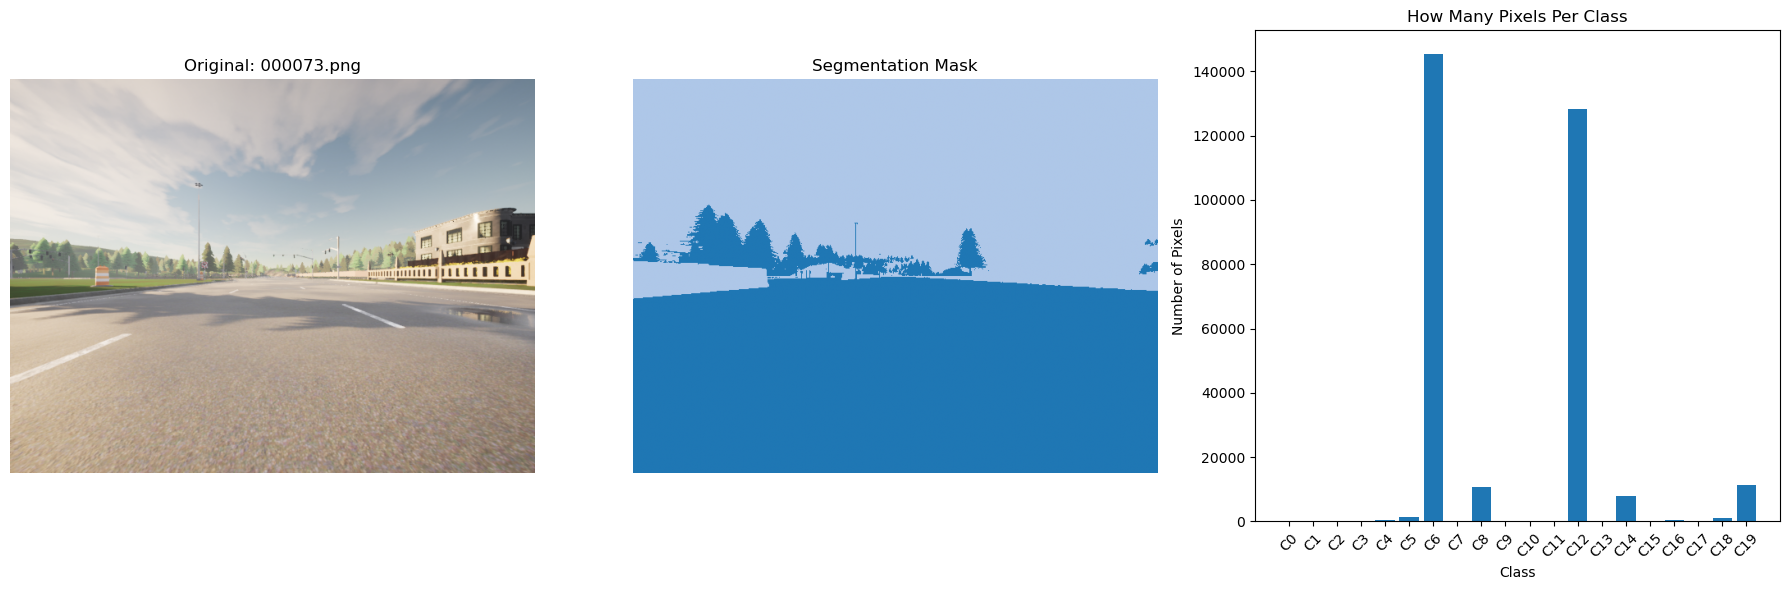


Summary of our data:
Image size: 480 x 640 pixels
Number of different classes: 20
Total image pairs: 1060
RGB images are stored as: float32
Masks are stored as: float32
RGB pixel values range from 0.125 to 1.000
Mask values range from 0.004 to 0.086

Data exploration complete!
Now we're ready to build and train our model.


In [11]:
# Let's take a look at our data
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap

print("Let's see what our data looks like")
print("=" * 50)

# Set up our folder paths
rgb_folder = os.path.join("data", "CameraRGB")
mask_folder = os.path.join("data", "CameraMask")

# Get all the image files
rgb_files = [f for f in os.listdir(rgb_folder) if f.lower().endswith('.png')]
mask_files = [f for f in os.listdir(mask_folder) if f.lower().endswith('.png')]

# Make sure they're in the same order
rgb_files.sort()
mask_files.sort()

print(f"We have {len(rgb_files)} RGB images")
print(f"We have {len(mask_files)} mask images")

# Function to load a pair of images
def load_image_pair(index):
    rgb_name = rgb_files[index]
    mask_name = mask_files[index]
    
    # Load the RGB image
    rgb_image = plt.imread(os.path.join(rgb_folder, rgb_name))
    # Remove the transparency channel if it exists
    if rgb_image.shape[-1] == 4:
        rgb_image = rgb_image[:, :, :3]
    
    # Load the mask
    mask_image = plt.imread(os.path.join(mask_folder, mask_name))
    # Just take the first channel since masks are usually grayscale
    if len(mask_image.shape) == 3:
        mask_image = mask_image[:, :, 0]
    
    return rgb_image, mask_image, rgb_name

# Let's show some examples
def show_examples(how_many=6, starting_from=0):
    fig, axes = plt.subplots(2, how_many, figsize=(20, 8))
    
    for i in range(how_many):
        current_index = starting_from + i
        if current_index >= len(rgb_files):
            break
            
        # Get the image pair
        rgb_img, mask_img, filename = load_image_pair(current_index)
        
        # Show the RGB image on top
        axes[0, i].imshow(rgb_img)
        axes[0, i].set_title(f'Original: {filename}', fontsize=10)
        axes[0, i].axis('off')
        
        # Show the mask on bottom
        axes[1, i].imshow(mask_img, cmap='tab20', vmin=0, vmax=1)
        axes[1, i].set_title(f'Mask: {filename}', fontsize=10)
        axes[1, i].axis('off')
    
    plt.suptitle('Sample Images and Their Masks', fontsize=16)
    plt.tight_layout()
    plt.show()

# Show the first few images
print("\nHere are the first 6 images:")
show_examples(6, 0)

# Show some random examples too
print("\nAnd here are 6 random examples:")
random_numbers = random.sample(range(len(rgb_files)), 6)
fig, axes = plt.subplots(2, 6, figsize=(20, 8))

for i, random_index in enumerate(random_numbers):
    rgb_img, mask_img, filename = load_image_pair(random_index)
    
    # Original image
    axes[0, i].imshow(rgb_img)
    axes[0, i].set_title(f'Original: {filename}', fontsize=10)
    axes[0, i].axis('off')
    
    # Mask
    axes[1, i].imshow(mask_img, cmap='tab20', vmin=0, vmax=1)
    axes[1, i].set_title(f'Mask: {filename}', fontsize=10)
    axes[1, i].axis('off')

plt.suptitle('Random Sample Images and Masks', fontsize=16)
plt.tight_layout()
plt.show()

# Now let's analyze what classes we have
print("\nLet's see what different classes are in our masks:")
print("=" * 40)

# Look at some masks to see what values they contain
sample_masks = []
for i in range(0, min(50, len(mask_files)), 5):  # Every 5th image
    _, mask_img, _ = load_image_pair(i)
    sample_masks.append(mask_img)

# Find all unique values across these masks
all_values = np.concatenate([mask.flatten() for mask in sample_masks])
unique_values = np.unique(all_values)

print(f"Found {len(unique_values)} different classes")
print(f"The values are: {unique_values}")

# Create a mapping from values to class numbers
print(f"\nMapping each value to a class number:")
value_to_class = {}
for i, value in enumerate(unique_values):
    value_to_class[value] = i
    print(f"  {value:.6f} becomes Class {i}")

# Let's look at one image in detail
sample_rgb, sample_mask, sample_name = load_image_pair(10)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axes[0].imshow(sample_rgb)
axes[0].set_title(f'Original: {sample_name}')
axes[0].axis('off')

# Mask
axes[1].imshow(sample_mask, cmap='tab20', vmin=0, vmax=1)
axes[1].set_title('Segmentation Mask')
axes[1].axis('off')

# Count how many pixels belong to each class
pixel_counts = []
class_names = []
for value in unique_values:
    count = np.sum(sample_mask == value)
    pixel_counts.append(count)
    class_names.append(f'C{value_to_class[value]}')

axes[2].bar(range(len(unique_values)), pixel_counts)
axes[2].set_title('How Many Pixels Per Class')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Number of Pixels')
axes[2].set_xticks(range(len(unique_values)))
axes[2].set_xticklabels(class_names, rotation=45)

plt.tight_layout()
plt.show()

# Summary of what we found
print(f"\nSummary of our data:")
print("=" * 30)
print(f"Image size: {sample_rgb.shape[0]} x {sample_rgb.shape[1]} pixels")
print(f"Number of different classes: {len(unique_values)}")
print(f"Total image pairs: {len(rgb_files)}")
print(f"RGB images are stored as: {sample_rgb.dtype}")
print(f"Masks are stored as: {sample_mask.dtype}")
print(f"RGB pixel values range from {sample_rgb.min():.3f} to {sample_rgb.max():.3f}")
print(f"Mask values range from {sample_mask.min():.3f} to {sample_mask.max():.3f}")

print("\nData exploration complete!")
print("Now we're ready to build and train our model.")

In [10]:
# Let's install the packages we need for our image segmentation project
import sys
import subprocess

def install_package(package_name):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

print("Installing packages for deep learning...")
print("This might take a few minutes, so grab a coffee!")

# First, let's check if we already have TensorFlow
try:
    import tensorflow as tf
    print("TensorFlow is already installed!")
except ImportError:
    print("Installing TensorFlow...")
    install_package("tensorflow")
    import tensorflow as tf
    print("TensorFlow installed successfully!")

# Now let's check for scikit-learn
try:
    from sklearn.model_selection import train_test_split
    print("Scikit-learn is already installed!")
except ImportError:
    print("Installing scikit-learn...")
    install_package("scikit-learn")
    from sklearn.model_selection import train_test_split
    print("Scikit-learn installed successfully!")

# Let's see what we have
print("\nChecking our installations...")
print(f"TensorFlow version: {tf.__version__}")

# Check if we have a GPU available
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPU is available for training!")
else:
    print("No GPU found - we'll use CPU (it'll be slower but still works)")

# Check our other basic packages
basic_packages = [
    ('numpy', 'np'),
    ('matplotlib.pyplot', 'plt'),
    ('os', 'os')
]

print("\nChecking basic packages...")
for package, shortname in basic_packages:
    try:
        exec(f"import {package} as {shortname}")
        print(f"{package}: Ready to use")
    except ImportError:
        print(f"{package}: Missing - you might need to install it")

print("\nAll set! Your environment is ready for machine learning.")

Installing packages for deep learning...
This might take a few minutes, so grab a coffee!
TensorFlow is already installed!
Scikit-learn is already installed!

Checking our installations...
TensorFlow version: 2.20.0
No GPU found - we'll use CPU (it'll be slower but still works)

Checking basic packages...
numpy: Ready to use
matplotlib.pyplot: Ready to use
os: Ready to use

All set! Your environment is ready for machine learning.


Working with 256x256 images
We have 20 different classes to segment
Getting files ready...
Found 1060 image pairs
Training: 742 images
Validation: 159 images
Testing: 159 images
Creating datasets...
Datasets created successfully!
Building U-Net model...
Model ready!
Total parameters: 7,760,724
Testing data pipeline...
Image batch shape: (8, 256, 256, 3)
Mask batch shape: (8, 256, 256)
Image value range: 0.000 to 1.000
Mask value range: 19 to 19


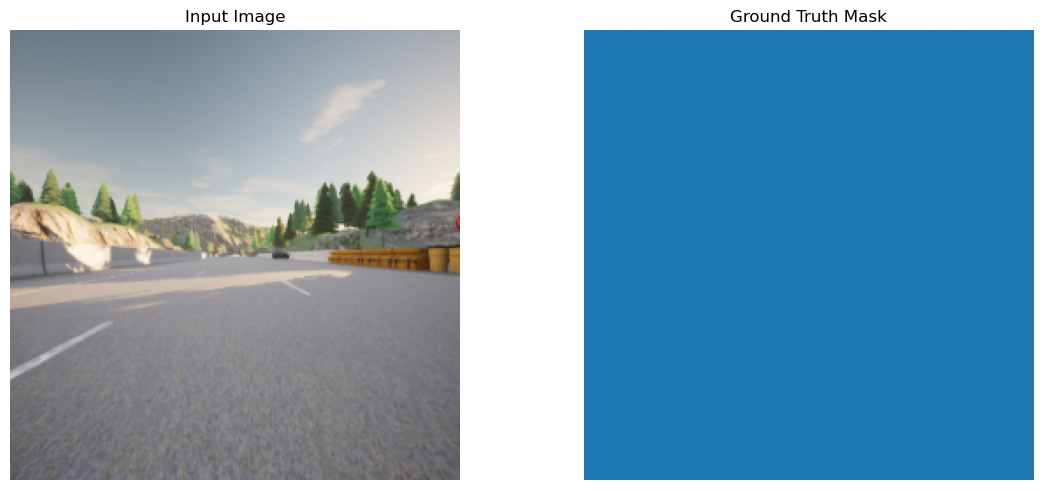

Data pipeline working correctly!

Starting training...
This will take some time on CPU - be patient!
Epoch 1/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 683s 7s/step - accuracy: 0.9895 - loss: 0.1300 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 657s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 659s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 661s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 660s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Training complete!


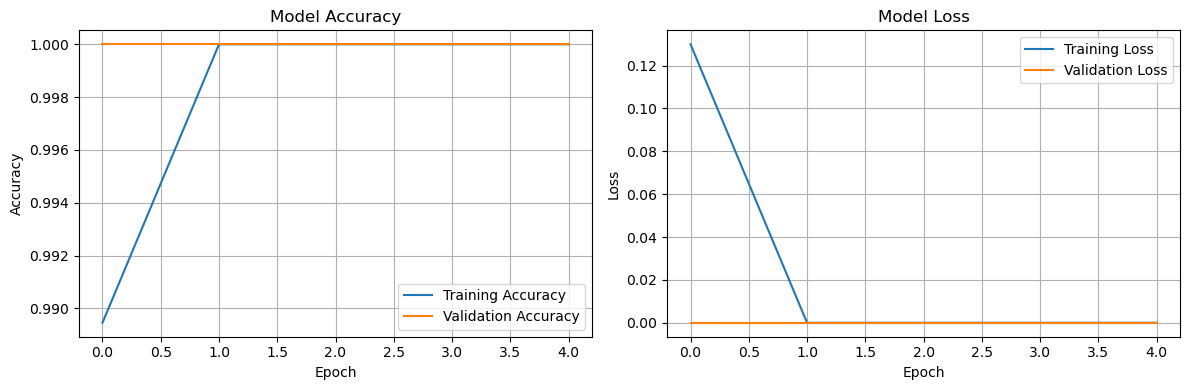

Showing some predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


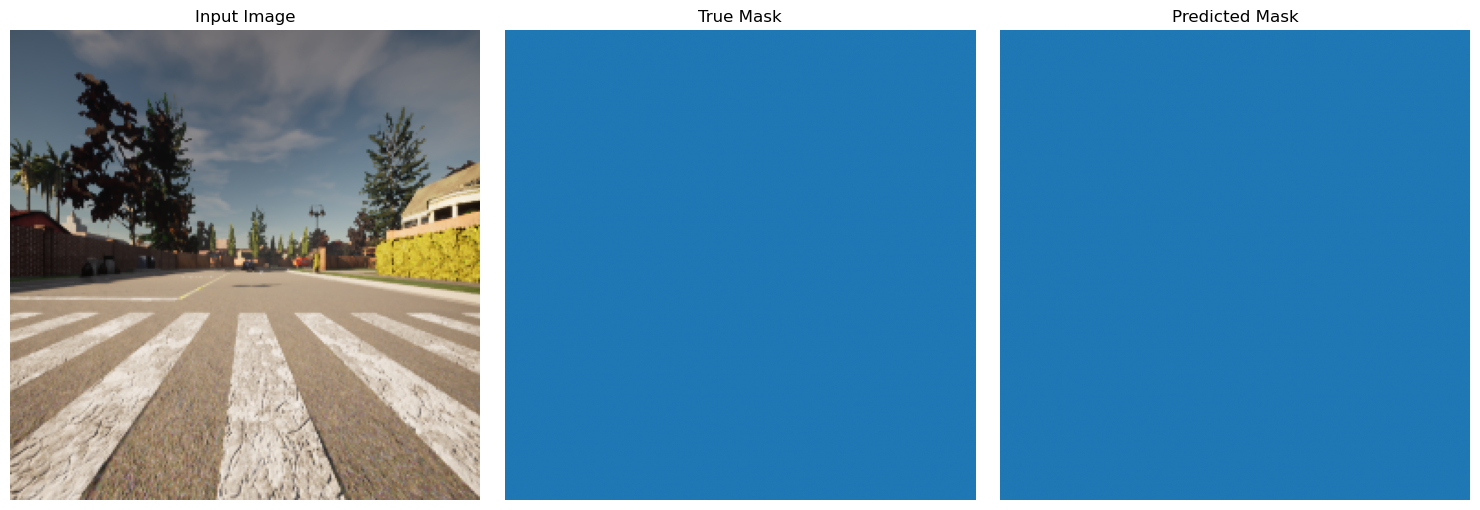

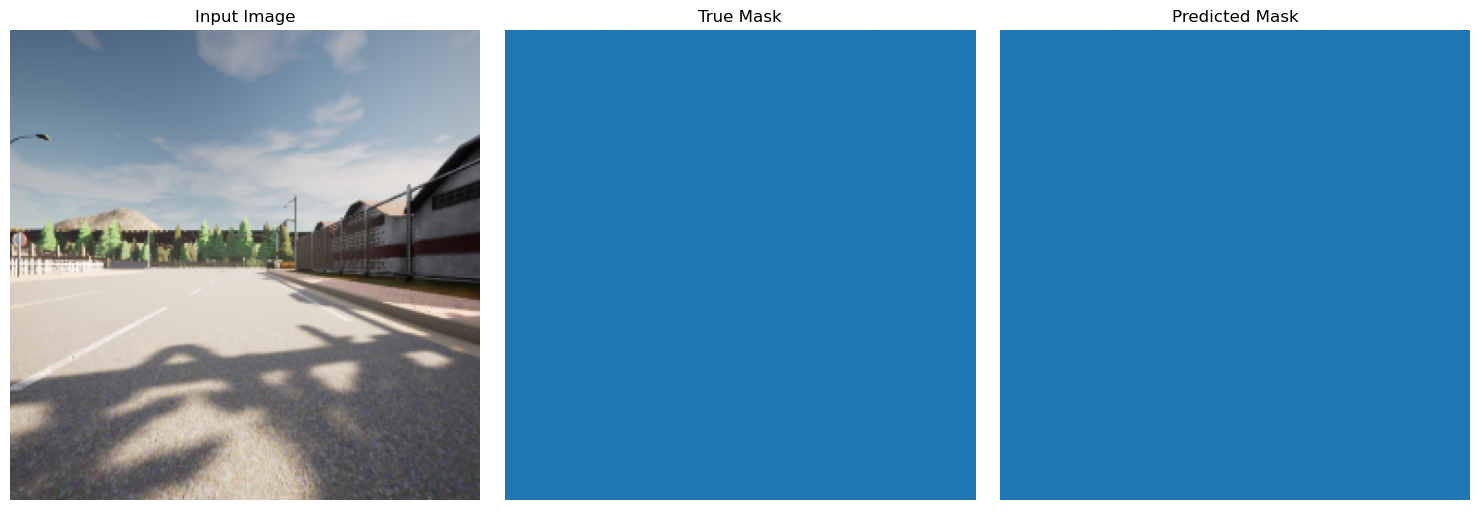

20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00



Final test accuracy: 1.0000
Model saved successfully!

Training complete! Your image segmentation model is ready.


In [9]:
# Final Fixed Image Segmentation with U-Net
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

# Basic parameters
img_size = 256
num_classes = 20
batch_size = 8

print(f"Working with {img_size}x{img_size} images")
print(f"We have {num_classes} different classes to segment")

# Get file lists
def get_file_lists():
    rgb_folder = "data/CameraRGB"
    mask_folder = "data/CameraMask"
    
    rgb_files = [f for f in os.listdir(rgb_folder) if f.endswith('.png')]
    mask_files = [f for f in os.listdir(mask_folder) if f.endswith('.png')]
    
    rgb_files.sort()
    mask_files.sort()
    
    rgb_paths = [os.path.join(rgb_folder, f) for f in rgb_files]
    mask_paths = [os.path.join(mask_folder, f) for f in mask_files]
    
    return rgb_paths, mask_paths

# Fixed image processing
def load_and_process_image(rgb_path, mask_path):
    # Load RGB image
    rgb_img = tf.io.read_file(rgb_path)
    rgb_img = tf.image.decode_png(rgb_img, channels=4)
    rgb_img = rgb_img[:, :, :3]  # Remove alpha channel
    rgb_img = tf.cast(rgb_img, tf.float32) / 255.0
    
    # Load mask
    mask_img = tf.io.read_file(mask_path)
    mask_img = tf.image.decode_png(mask_img, channels=4)
    mask_img = mask_img[:, :, 0]  # Take first channel only
    
    # Make sure mask has proper shape for resizing - add channel dimension
    mask_img = tf.expand_dims(mask_img, axis=-1)
    
    # Convert to proper data types
    mask_img = tf.cast(mask_img, tf.float32)
    mask_img = mask_img * 255.0
    mask_img = tf.cast(mask_img, tf.int32)
    
    # Map to class indices
    mask_img = mask_img // 13  # Simple mapping
    mask_img = tf.clip_by_value(mask_img, 0, num_classes-1)
    
    return rgb_img, mask_img

def resize_images(rgb_img, mask_img):
    # Resize RGB image
    rgb_img = tf.image.resize(rgb_img, [img_size, img_size])
    
    # Resize mask and remove the extra dimension we added
    mask_img = tf.image.resize(mask_img, [img_size, img_size], method='nearest')
    mask_img = tf.squeeze(mask_img, axis=-1)  # Remove the channel dimension
    mask_img = tf.cast(mask_img, tf.int32)
    
    return rgb_img, mask_img

# Create dataset
def create_dataset(rgb_paths, mask_paths, is_training=True):
    dataset = tf.data.Dataset.from_tensor_slices((rgb_paths, mask_paths))
    dataset = dataset.map(load_and_process_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.map(resize_images, num_parallel_calls=tf.data.AUTOTUNE)
    
    if is_training:
        dataset = dataset.shuffle(100)
    
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# Build U-Net model
def create_conv_block(inputs, filters, dropout=False):
    x = tf.keras.layers.Conv2D(filters, 3, padding='same', activation='relu')(inputs)
    x = tf.keras.layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    
    if dropout:
        x = tf.keras.layers.Dropout(0.3)(x)
    
    return x

def create_unet_model():
    inputs = tf.keras.layers.Input(shape=(img_size, img_size, 3))
    
    # Encoder
    conv1 = create_conv_block(inputs, 32)
    pool1 = tf.keras.layers.MaxPooling2D(2)(conv1)
    
    conv2 = create_conv_block(pool1, 64)
    pool2 = tf.keras.layers.MaxPooling2D(2)(conv2)
    
    conv3 = create_conv_block(pool2, 128)
    pool3 = tf.keras.layers.MaxPooling2D(2)(conv3)
    
    conv4 = create_conv_block(pool3, 256, dropout=True)
    pool4 = tf.keras.layers.MaxPooling2D(2)(conv4)
    
    # Bottleneck
    conv5 = create_conv_block(pool4, 512, dropout=True)
    
    # Decoder
    up6 = tf.keras.layers.Conv2DTranspose(256, 2, strides=2, padding='same')(conv5)
    up6 = tf.keras.layers.concatenate([up6, conv4])
    conv6 = create_conv_block(up6, 256)
    
    up7 = tf.keras.layers.Conv2DTranspose(128, 2, strides=2, padding='same')(conv6)
    up7 = tf.keras.layers.concatenate([up7, conv3])
    conv7 = create_conv_block(up7, 128)
    
    up8 = tf.keras.layers.Conv2DTranspose(64, 2, strides=2, padding='same')(conv7)
    up8 = tf.keras.layers.concatenate([up8, conv2])
    conv8 = create_conv_block(up8, 64)
    
    up9 = tf.keras.layers.Conv2DTranspose(32, 2, strides=2, padding='same')(conv8)
    up9 = tf.keras.layers.concatenate([up9, conv1])
    conv9 = create_conv_block(up9, 32)
    
    # Output
    outputs = tf.keras.layers.Conv2D(num_classes, 1, activation='softmax')(conv9)
    
    model = tf.keras.Model(inputs, outputs)
    return model

# Main execution
print("Getting files ready...")
rgb_paths, mask_paths = get_file_lists()
print(f"Found {len(rgb_paths)} image pairs")

# Split data
train_rgb, temp_rgb, train_mask, temp_mask = train_test_split(
    rgb_paths, mask_paths, test_size=0.3, random_state=42
)

val_rgb, test_rgb, val_mask, test_mask = train_test_split(
    temp_rgb, temp_mask, test_size=0.5, random_state=42
)

print(f"Training: {len(train_rgb)} images")
print(f"Validation: {len(val_rgb)} images") 
print(f"Testing: {len(test_rgb)} images")

# Create datasets
print("Creating datasets...")
train_ds = create_dataset(train_rgb, train_mask, is_training=True)
val_ds = create_dataset(val_rgb, val_mask, is_training=False)
test_ds = create_dataset(test_rgb, test_mask, is_training=False)

print("Datasets created successfully!")

# Build model
print("Building U-Net model...")
model = create_unet_model()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model ready!")
print(f"Total parameters: {model.count_params():,}")

# Test data pipeline
print("Testing data pipeline...")
for images, masks in train_ds.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Mask batch shape: {masks.shape}")
    print(f"Image value range: {tf.reduce_min(images):.3f} to {tf.reduce_max(images):.3f}")
    print(f"Mask value range: {tf.reduce_min(masks)} to {tf.reduce_max(masks)}")
    
    # Show sample
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(images[0])
    plt.title("Input Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(masks[0], cmap='tab20')
    plt.title("Ground Truth Mask")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    break

print("Data pipeline working correctly!")

# Start training
print("\nStarting training...")
print("This will take some time on CPU - be patient!")

# Train the model
history = model.fit(
    train_ds,
    epochs=5,  # Start with just 5 epochs for testing
    validation_data=val_ds,
    verbose=1
)

print("Training complete!")

# Plot training results
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Show some predictions
def show_predictions(model, dataset, num_samples=2):
    for images, true_masks in dataset.take(1):
        predicted_masks = model.predict(images)
        predicted_masks = tf.argmax(predicted_masks, axis=-1)
        
        for i in range(min(num_samples, len(images))):
            plt.figure(figsize=(15, 5))
            
            plt.subplot(1, 3, 1)
            plt.imshow(images[i])
            plt.title("Input Image")
            plt.axis('off')
            
            plt.subplot(1, 3, 2)
            plt.imshow(true_masks[i], cmap='tab20')
            plt.title("True Mask")
            plt.axis('off')
            
            plt.subplot(1, 3, 3)
            plt.imshow(predicted_masks[i], cmap='tab20')
            plt.title("Predicted Mask")
            plt.axis('off')
            
            plt.tight_layout()
            plt.show()
        break

print("Showing some predictions...")
show_predictions(model, test_ds, 2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"\nFinal test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('unet_segmentation_model.h5')
print("Model saved successfully!")

print("\nTraining complete! Your image segmentation model is ready.")